In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Load Data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/yigitatesh/ml/main/datasets/cars_updated.csv")

In [ ]:
df.head(3)

,height,length,width,driveline,engine,gears,transmission,cty,fuel_type,hwy,id,make,model_year,year,hp,torque,model,km_per_l_cty,km_per_l_hwy
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,6,Automatic,18,Gasoline,25,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236,Audi A3,6.343612,8.810573
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,6,Automatic,22,Gasoline,28,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207,Audi A3,7.753304,9.867841
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,6,Manual,21,Gasoline,30,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207,Audi A3,7.400881,10.572687


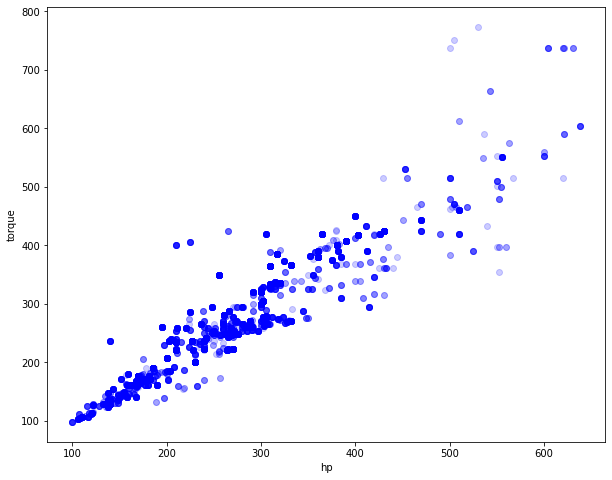

In [ ]:
# plot torque and hp values
X = df["hp"].values
y = df["torque"].values

plt.figure(figsize=(10, 8))
plt.xlabel("hp")
plt.ylabel("torque")
plt.scatter(X, y, color="blue", alpha=0.2)

## Linear Regression

Target is finding the best line fit<br>
$$
    \hat{y} = w .X + b
$$

Minimizing the Error:<br>
$$
    Error = (y - \hat{y})^2 \\
          = (y - (w .X + b))^2 \\
          = (y - w.X - b)^2
$$

Gradients:<br>
$$
    \frac{dJ}{dw} = 2.(y - \hat{y}).(-X) \\
    \frac{dJ}{db} = 2.(y - \hat{y}).(-1)
$$

Updating Weights: <br>
Repeat for some number of iterations: <br>
$$
\omega^+ = \omega - \alpha.\frac{dJ}{d\omega}\\
b^+ = b - \alpha.\frac{dJ}{db}\\
$$

Cost 
$$
\frac{1}{m}.\sum_{i=0}^{m}(y_i - \hat{y}_i)^2
$$

In [ ]:
# Linear Regression class





In [ ]:
# fit


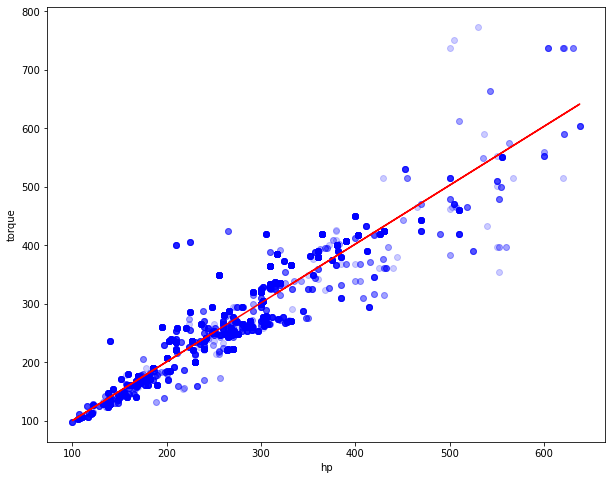

In [ ]:
# plot the fitted line
preds = lr.predict(X)

plt.figure(figsize=(10, 8))
plt.xlabel("hp")
plt.ylabel("torque")
plt.scatter(X, y, color="blue", alpha=0.2)
plt.plot(X, preds, color="red")

In [2]:
# plot costs




## 3D Cost Plot

In [ ]:
# on jupyter notebook, uncomment below line
#%matplotlib notebook

In [ ]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

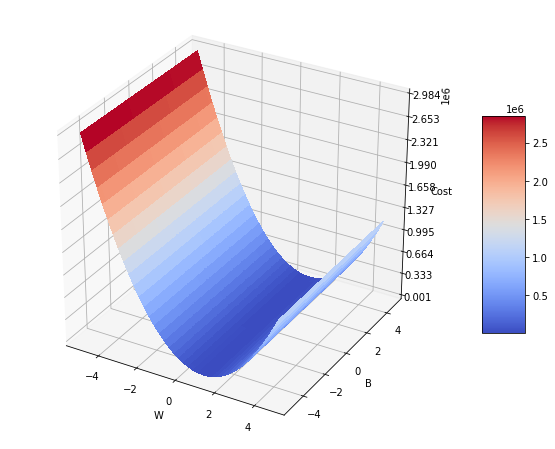

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 8))

# Make data.
W = np.arange(-5, 5, 0.25)
B = np.arange(-5, 5, 0.25)
W, B = np.meshgrid(W, B)
Cost = np.zeros_like(W)
for i in range(Cost.shape[0]):
    for j in range(Cost.shape[1]):
        preds = W[i][j] * X + B[i][j]
        Cost[i][j] = np.sum((y - preds) ** 2) / len(y)

# Plot the surface.
surf = ax.plot_surface(W, B, Cost, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel("W")
ax.set_ylabel("B")
ax.set_zlabel("Cost")

plt.show()

In [ ]:
print(lr.w, lr.b)

1.0056889499251767 0.0034406113990576347


## Ridge Regression

Target is finding the best line fit<br>
$$
    \hat{y} = w .X + b
$$

Minimizing the Error:<br>
$$
    Error = (y - \hat{y})^2 + \lambda.w^2\\
          = (y - (w .X + b))^2 + \lambda.w^2\\
          = (y - w.X - b)^2 + \lambda.w^2
$$

Gradients:<br>
$$
    \frac{dJ}{dw} = 2.(y - \hat{y}).(-X) + 2.\lambda.w\\
    \frac{dJ}{db} = 2.(y - \hat{y}).(-1)
$$

Updating Weights: <br>
Repeat for some number of iterations: <br>
$$
\omega^+ = \omega - \alpha.\frac{dJ}{d\omega}\\
b^+ = b - \alpha.\frac{dJ}{db}\\
$$

Cost 
$$
\frac{1}{m}.\sum_{i=0}^{m}(y_i - \hat{y}_i)^2 + \frac{1}{k}.\lambda.\sum_{j=0}^{k}w_j^2
$$

In [ ]:
# Ridge Regression class





In [ ]:
# fit


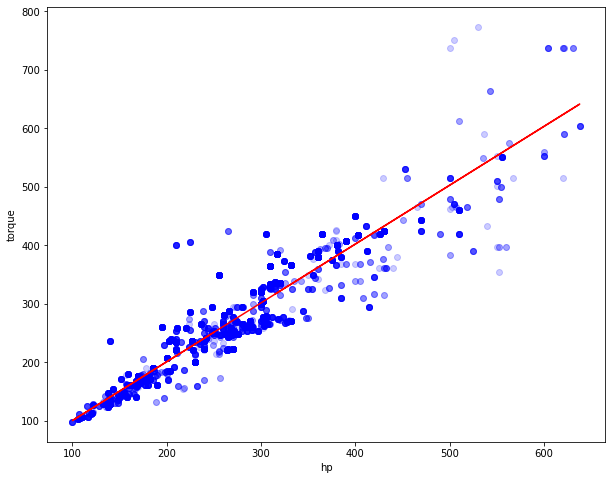

In [ ]:
# plot the fitted line
preds = rr.predict(X)

plt.figure(figsize=(10, 8))
plt.xlabel("hp")
plt.ylabel("torque")
plt.scatter(X, y, color="blue", alpha=0.2)
plt.plot(X, preds, color="red")

In [ ]:
rr.score(X, y)

0.8800131400641861

In [ ]:
rr.score(X, y) - lr.score(X, y)

9.002798506685394e-13

# Polynomial Regression

In [ ]:
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures 

## Load Nonlinear Regression Data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/yigitatesh/ml/main/datasets/nonlinear.csv").iloc[:, 1:]
df.head()

,0,1
0,97.58776,1.0
1,97.76344,2.0
2,96.56705,3.0
3,92.52037,4.0
4,91.15097,5.0


In [ ]:
X = df.iloc[:, 1].values
y = df.iloc[:, 0].values

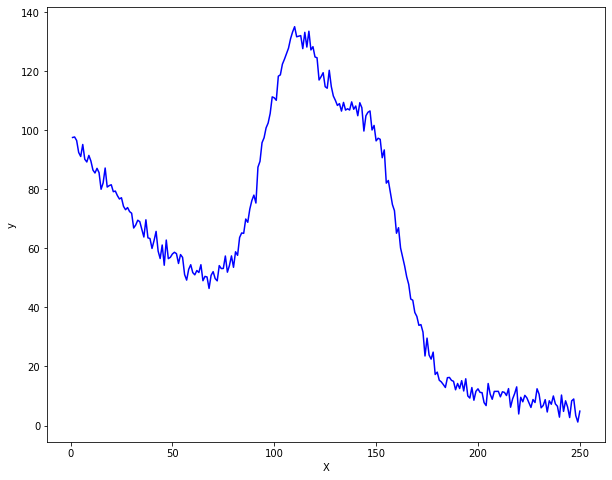

In [ ]:
# visualize the data
plt.figure(figsize=(10, 8))
plt.xlabel("X")
plt.ylabel("y")
plt.plot(X, y, color="blue")

## Fit Polynomial Regression

In [3]:
# fit polynomial regression





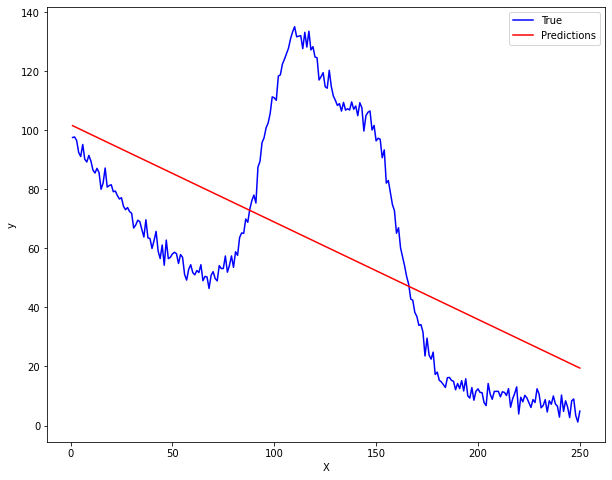

In [ ]:
# visualize nonlinear regression


plt.figure(figsize=(10, 8))
plt.xlabel("X")
plt.ylabel("y")
plt.plot(X, y, color="blue", label="True")
plt.plot(X, preds, color="red", label="Predictions")
plt.legend()

## Fit different degrees

In [ ]:
# fit degrees between 1 and 10 and plot them


## Bias Variance Tradeoff

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# prepare train and test data
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.25, random_state=1)

In [4]:
# plot train and test scores by degrees
train_scores, test_scores = [], []

degrees = list(range(1, 20))
for degree in degrees:
    # fit polynomial regression
    poly = PolynomialFeatures(degree=degree)
    X_train_trans = poly.fit_transform(X_train)
    X_test_trans = poly.transform(X_test)

    lr = LinearRegression().fit(X_train_trans, y_train)

    # test and train scores
    train_scores.append(lr.score(X_train_trans, y_train))
    test_scores.append(lr.score(X_test_trans, y_test))

# plot scores
plt.figure(figsize=(10, 8))
plt.xlabel("degree")
plt.ylabel("score")
plt.plot(degrees, train_scores, color="blue", label="train score")
plt.plot(degrees, test_scores, color="orange", label="test score")
plt.xticks(degrees)
plt.legend()

# House Pricing Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [ ]:
url = "https://raw.githubusercontent.com/yigitatesh/ml/main/datasets/house_data.csv"